In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scipy
#import yellowbrick > lijkt even niet te werken?
import mlxtend

In [2]:
#importing the csv file, zonder trouw_col
data = pd.read_csv('df3.csv', sep=',')

In [3]:
#extra column is inserted, you don't want that, remove the column
del data['Unnamed: 0']

In [4]:
# load dataset
y = data.loc[:,('trouw_don')]
X = data.loc[:,('NrPreviousDonations', 'Gender', 'AgeDISParticipation',
        'Work_hours', 'v12_a', 'v12_b', 'v12_c', 'v12_d',
       'D2_v13', 'D2_v15', 'D2_v16_1', 'D2_v16_2', 'D2_v16_3', 'D2_v16_4',
       'D2_v16_5', 'D2_v16_6', 'D2_v16_7', 'D2_v16_8', 'D2_v16_9',
       'D2_v16_10', 'D2_v16_11', 'D2_v16_12', 'v20cog', 'v20af', 'v21_int',
       'v20ses', 'v21_sn', 'v21_mn', 'v29_1', 'v40_1', 'v47', 'v46', 'v48',
       'v52mgz', 'v52_g', 'v52_h', 'v52_i', 'v52sg', 'v61_0', 'v60_0')]

## Splitting data

In [5]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

In [6]:
#make a testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [7]:
#we use the parameters that were selected in our 'Trainingen'-file
tree_model = DecisionTreeClassifier(criterion='entropy', random_state=100, 
                                   max_depth=5, max_leaf_nodes=None, min_samples_leaf=5,
                                   min_samples_split=20)
clf = tree_model.fit(X_train, y_train)

In [8]:
y_pred = tree_model.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [9]:
scores = cross_val_score(tree_model, X, y, cv=10)
print(scores)

[0.81895882 0.81493002 0.81493002 0.82348367 0.81726283 0.81570762
 0.80870918 0.8118196  0.82412451 0.81011673]


In [10]:
import numpy as np

In [11]:
print("Accuracy is", accuracy_score(y_test, y_pred)*100)
print("Average fold accuracy is", np.mean(scores)*100)

Accuracy is 81.15603939865214
Average fold accuracy is 81.60042987889717


## Confusion matrix 

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [13]:
labels = np.unique(y_test)

In [14]:
#this code was found online to plot our confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 109  680]
 [  47 3022]]


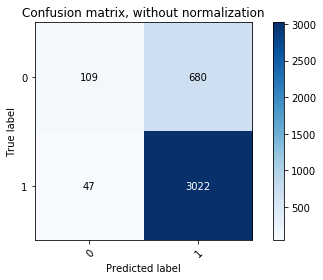

In [15]:
#without normalization
plot_confusion_matrix(y_test, y_pred, labels)

Normalized confusion matrix
[[0.13814956 0.86185044]
 [0.01531443 0.98468557]]


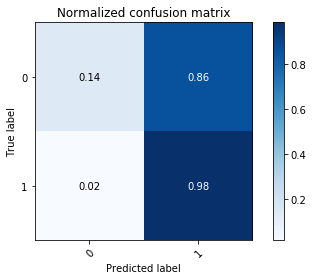

In [16]:
#with normalization
plot_confusion_matrix(y_test, y_pred, labels, normalize=True)
#percentages!

In [33]:
feature_names = data.columns[2:]

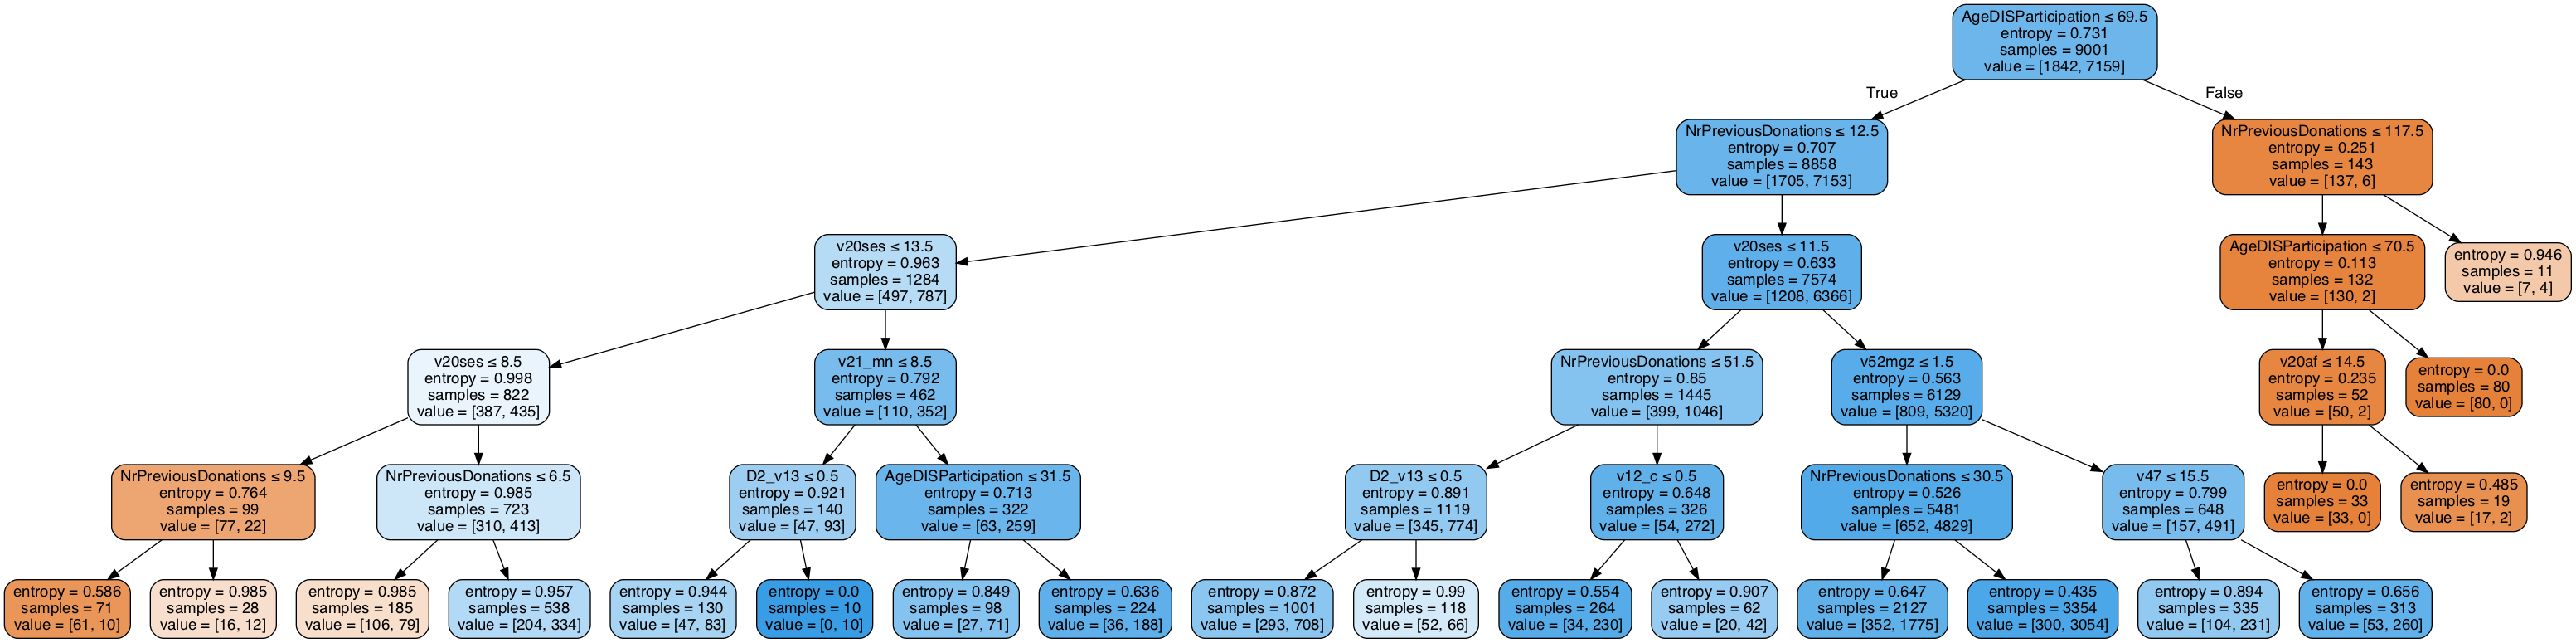

In [35]:
#create the tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [21]:
## source: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

In [13]:
# feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection
from mlxtend.classifier import StackingClassifier

In [14]:
sfs1 = SFS(tree_model, 
          k_features = 'best',
          forward = True,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 10)

sfs1 = sfs1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s finished

[2019-05-06 11:57:14] Features: 1/40 -- score: 0.8095498132700933[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.4s finished

[2019-05-06 11:57:15] Features: 2/40 -- score: 0.8097829738291218[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.4s finished

[2019-05-06 11:57:17] Features: 3/40 -- score: 0.8100163158361294[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    2.2s finished

[2019-05-06 11:58:14] Features: 28/40 -- score: 0.8169373643410109[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.2s finished

[2019-05-06 11:58:16] Features: 29/40 -- score: 0.8169373643410109[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.1s finished

[2019-05-06 11:58:18] Features: 30/40 -- score: 0.8169373643410109[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished

[2019-05-06 11:58:20] Features: 31/

In [29]:
#features, combinaties & their accuracy
sfs1.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.80963481, 0.81026439, 0.80948678, 0.8125972 , 0.8125972 ,
         0.81104199, 0.80171073, 0.80793157, 0.81245136, 0.8077821 ]),
  'avg_score': 0.8095498132700933,
  'feature_names': ('AgeDISParticipation',)},
 2: {'feature_idx': (2, 12),
  'cv_scores': array([0.81041181, 0.81104199, 0.80948678, 0.8125972 , 0.81415241,
         0.8118196 , 0.80326594, 0.80559876, 0.81089494, 0.80856031]),
  'avg_score': 0.8097829738291218,
  'feature_names': ('AgeDISParticipation', 'D2_v16_3')},
 3: {'feature_idx': (2, 12, 32),
  'cv_scores': array([0.81041181, 0.8118196 , 0.80948678, 0.8118196 , 0.8125972 ,
         0.8125972 , 0.80404355, 0.80715397, 0.81167315, 0.80856031]),
  'avg_score': 0.8100163158361294,
  'feature_names': ('AgeDISParticipation', 'D2_v16_3', 'v48')},
 4: {'feature_idx': (2, 6, 12, 32),
  'cv_scores': array([0.81041181, 0.8118196 , 0.80948678, 0.8118196 , 0.8125972 ,
         0.8125972 , 0.80404355, 0.80715397, 0.81167315, 0.8085

In [30]:
#best feature combination
sfs1.k_feature_names_

('NrPreviousDonations',
 'AgeDISParticipation',
 'v12_a',
 'v12_c',
 'v12_d',
 'D2_v13',
 'D2_v16_2',
 'D2_v16_3',
 'D2_v16_5',
 'D2_v16_10',
 'D2_v16_12',
 'v20af',
 'v21_int',
 'v20ses',
 'v29_1',
 'v40_1',
 'v48',
 'v52_g',
 'v52_h',
 'v60_0')

In [31]:
## plotting the results

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

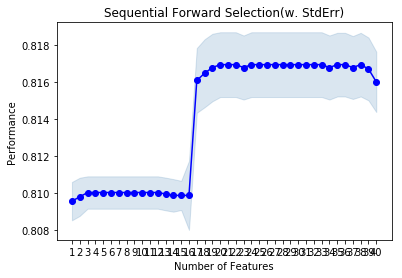

In [ ]:
#number of features with optimal accuracy are showed in this plot

sfs = sfs1 #define your trained features
fig = plot_sfs(sfs.get_metric_dict(), kind = 'std_err')
plt.title('Sequential Forward Selection(w. StdErr)')
plt.figure(figsize=(800,800))
plt.grid()


plt.show()

In [15]:
#visualise in a dataframe
sfs = sfs1
df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
#df.to_excel('dataframe_all')

In [16]:
df.to_excel('dataframe_all.xls')

In [17]:
print('Best accuracy score: %.2f' %sfs1.k_score_)
print('Best subset (indices):', sfs1.k_feature_idx_)
print('Best subset (corresponding names):', sfs1.k_feature_names_ )

Best accuracy score: 0.82
Best subset (indices): (0, 2, 4, 6, 7, 8, 11, 12, 14, 19, 21, 23, 24, 25, 28, 29, 32, 34, 35, 39)
Best subset (corresponding names): ('NrPreviousDonations', 'AgeDISParticipation', 'v12_a', 'v12_c', 'v12_d', 'D2_v13', 'D2_v16_2', 'D2_v16_3', 'D2_v16_5', 'D2_v16_10', 'D2_v16_12', 'v20af', 'v21_int', 'v20ses', 'v29_1', 'v40_1', 'v48', 'v52_g', 'v52_h', 'v60_0')
